Importing libraries required for Data Analysis

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns 

Importing the Dataset

In [4]:
df=pd.read_csv('/Users/bharath/Desktop/Bharath_Kaggle/Retail_Transaction_Dataset.csv')

Data Analysis Starts Here!!

In [6]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [7]:
df.tail()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
99995,726461,A,2,56.078258,7/17/2023 16:59,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
99996,328056,A,6,88.516406,5/30/2023 9:04,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
99997,887304,B,4,72.385564,8/25/2023 7:59,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472
99998,326401,C,5,66.542239,2/5/2024 19:45,PayPal,"18756 Mcfarland Way Suite 866\nBarnettside, PR...",Electronics,14.345018,284.983717
99999,771566,C,5,38.087766,2/4/2024 11:53,Debit Card,"8046 Hull Drive\nPaulstad, GU 87218",Home Decor,2.966058,184.790305


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [9]:
df.describe()

,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,10.020155,248.334955
std,288460.917524,2.579808,25.971567,5.779534,184.554792
min,14.000000,1.000000,10.000430,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,15.018367,362.009980
max,999997.000000,9.000000,99.999284,19.999585,896.141242


In [10]:
for col in df:
    print(df[col].unique())

[109318 993229 579675 ... 887304 326401 771566]
['C' 'A' 'D' 'B']
[7 4 8 5 3 6 2 1 9]
[80.07984415 75.19522942 31.52881648 ... 72.38556379 66.54223948
 38.08776628]
['12/26/2023 12:32' '8/5/2023 0:00' '3/11/2024 18:51' ...
 '7/17/2023 16:59' '8/25/2023 7:59' '2/4/2024 11:53']
['Cash' 'PayPal' 'Debit Card' 'Credit Card']
['176 Andrew Cliffs\nBaileyfort, HI 93354'
 '11635 William Well Suite 809\nEast Kara, MT 19483'
 '910 Mendez Ville Suite 909\nPort Lauraland, MO 99563' ...
 '50653 Kara Lakes\nStephanieborough, RI 94492'
 '18756 Mcfarland Way Suite 866\nBarnettside, PR 50529'
 '8046 Hull Drive\nPaulstad, GU 87218']
['Books' 'Home Decor' 'Electronics' 'Clothing']
[18.6770995  14.12136502 15.94370066 ... 17.42397944 14.34501785
  2.96605804]
[455.8627638 258.3065464 212.0156509 ... 239.0924721 284.9837168
 184.7903051]


In [11]:
df.drop(['CustomerID', 'ProductID'], axis=1, inplace=True)

In [12]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']).dt.date

In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [14]:
print("numerical columns are: ",numerical_cols)

numerical columns are:  Index(['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount'], dtype='object')


In [15]:
pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [16]:
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(df)

In [18]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
top_dates = df['TransactionDate'].value_counts().head(10)
print("Top 10 Transaction Dates:")
print(top_dates)

Top 10 Transaction Dates:
TransactionDate
2023-12-01    330
2023-07-08    319
2023-09-06    316
2023-11-05    316
2024-01-13    311
2023-08-24    311
2023-11-18    309
2023-09-22    309
2023-05-25    308
2023-06-29    308
Name: count, dtype: int64


In [20]:
filtered_data = df[df['Price'] > 55]
top_payment_method = filtered_data['PaymentMethod'].value_counts().idxmax()
print(f"The most frequently used Payment Method for Price > 55 is: {top_payment_method}")

The most frequently used Payment Method for Price > 55 is: Credit Card


/var/folders/_n/5gwc3_tx3_7drm595q7gbr8h0000gn/T/ipykernel_1402/275366986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProductCategory", y="TotalAmount", data=df, estimator=np.sum, errorbar=None, palette="Set2")


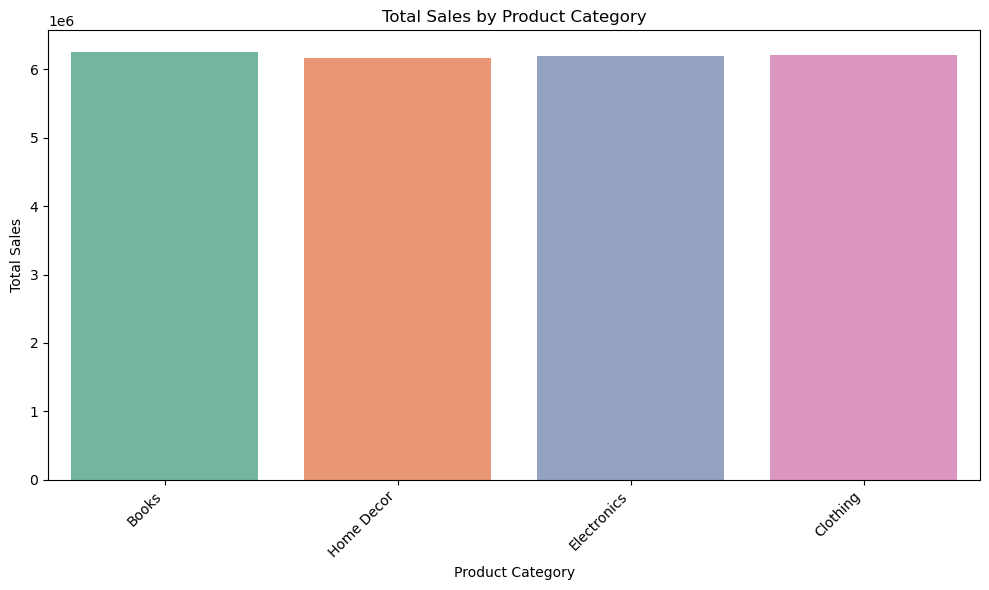

In [56]:
# Set the figure size and reduce width to avoid horizontal scroll
plt.figure(figsize=(10, 6))  # Adjust width if necessary

# Create the barplot
sns.barplot(x="ProductCategory", y="TotalAmount", data=df, estimator=np.sum, errorbar=None, palette="Set2")

# Title and labels
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")

# Rotate x-axis labels and adjust alignment to avoid overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [87]:
import pandas as pd

# Perform One-Hot Encoding for 'ProductCategory' and 'PaymentMethod'
df = pd.get_dummies(df, columns=['ProductCategory', 'PaymentMethod'], drop_first=True)

# Show the result after One-Hot Encoding
print("Data after One-Hot Encoding:")
df.head()

Data after One-Hot Encoding:


,Quantity,Price,TransactionDate,StoreLocation,DiscountApplied(%),TotalAmount,ProductCategory_Label,PaymentMethod_Label,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home Decor,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal
0,7,80.079844,2023-12-26,"176 Andrew Cliffs\nBaileyfort, HI 93354",18.677100,455.862764,0,0,False,False,False,False,False,False
1,4,75.195229,2023-08-05,"11635 William Well Suite 809\nEast Kara, MT 19483",14.121365,258.306546,3,0,False,False,True,False,False,False
2,8,31.528816,2024-03-11,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",15.943701,212.015651,0,0,False,False,False,False,False,False
3,5,98.880218,2023-10-27,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",6.686337,461.343769,0,3,False,False,False,False,False,True
4,7,93.188512,2023-12-22,"0070 Michelle Island Suite 143\nHoland, VA 80142",4.030096,626.030484,2,0,False,True,False,False,False,False


In [69]:
X = df[["Quantity", "Price", "DiscountApplied(%)"]]
y = df["TotalAmount"]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Scale the entire dataset (X) before applying cross-validation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire feature set

# Initialize models with fewer trees and parallelization
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)  # Parallelize and reduce trees
}

# Perform cross-validation, and calculate MSE and R² for each model
for name, model in models.items():
    # Reduce the number of folds to 3 to speed up cross-validation
    mse_scores = cross_val_score(model, X_scaled, y, cv=3, scoring='neg_mean_squared_error')
    mse_scores = -mse_scores  # Convert negative MSE to positive

    # Cross-validation for R² (R-squared, higher is better)
    r2_scores = cross_val_score(model, X_scaled, y, cv=3, scoring='r2')

    # Print the mean and standard deviation of the cross-validation results
    print(f"{name} - MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}, R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")


Decision Tree - MSE: 3.6500 ± 0.0521, R²: 0.9999 ± 0.0000
Random Forest - MSE: 0.6997 ± 0.0155, R²: 1.0000 ± 0.0000
